In [ ]:
# https://github.com/udacity/DSND_Term1

In [6]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data, y = make_moons(n_samples=200,noise=0.09)

In [3]:
# Ward method default in agglomerative clustering, linkage='ward'
ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(data)

complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(data)

avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(data)

In [4]:
ward_ar_score = adjusted_rand_score(y, ward_pred)
complete_ar_score = adjusted_rand_score(y, complete_pred)
avg_ar_score = adjusted_rand_score(y, avg_pred)

In [5]:
print(ward_ar_score)
print(complete_ar_score)
print(avg_ar_score)

0.43308048432329405
0.393856795600424
0.14800743874722855


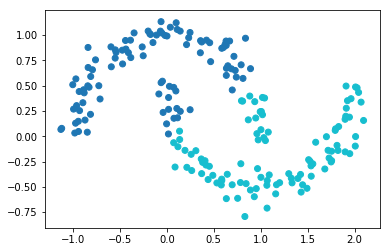

In [22]:
kmeans_2 = KMeans(2)
model_2 = kmeans_2.fit(data)
# Label_4 is the dependent variable which we created
label_2 = model_2.predict(data) # or model_4.labels_
# Incorrectly identified clusters using kmeans
plt.scatter(data[:, 0], data[:, 1], c=avg_pred, cmap='tab10'); # we choose only 3 columns to visualize
#plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

### Normalizing 

In [14]:
normalized_data = normalize(data)
#normalized_data[:]

In [15]:
# Ward method default in agglomerative clustering, linkage='ward'
ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(normalized_data)

complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(normalized_data)

avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(normalized_data)

In [17]:
ward_ar_score = adjusted_rand_score(y, ward_pred)
complete_ar_score = adjusted_rand_score(y, complete_pred)
avg_ar_score = adjusted_rand_score(y, avg_pred)

In [18]:
print(ward_ar_score)
print(complete_ar_score)
print(avg_ar_score)

0.5305525267303991
0.20797819173103138
0.5305525267303991


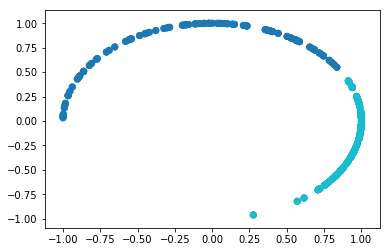

In [60]:
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=ward_pred, cmap='tab10'); 
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=complete_pred, cmap='tab10');
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=avg_pred, cmap='tab10');

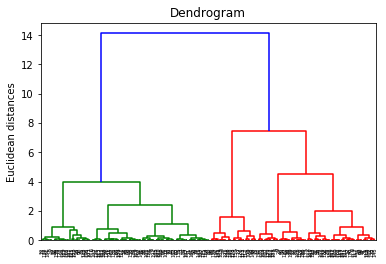

In [61]:
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

### Standardizing, although normalizing works better

In [54]:
sc = StandardScaler()
standardized_data = sc.fit_transform(data)

# Ward method default in agglomerative clustering, linkage='ward'
ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(standardized_data)

complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(standardized_data)

avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(standardized_data)

ward_ar_score = adjusted_rand_score(y, ward_pred)
complete_ar_score = adjusted_rand_score(y, complete_pred)
avg_ar_score = adjusted_rand_score(y, avg_pred)

print(ward_ar_score)
print(complete_ar_score)
print(avg_ar_score)

0.6873744185823383
0.5754881066612797
0.6707993237470232


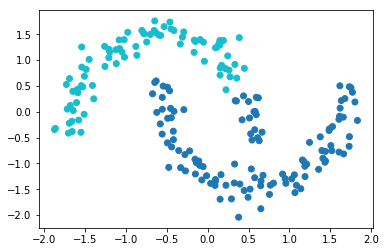

In [55]:
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=ward_pred, cmap='tab10'); # we choose only 3 columns to visualize

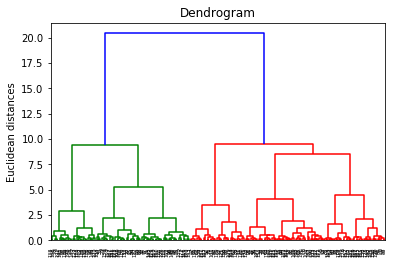

In [62]:
dendrogram = sch.dendrogram(sch.linkage(standardized_data, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

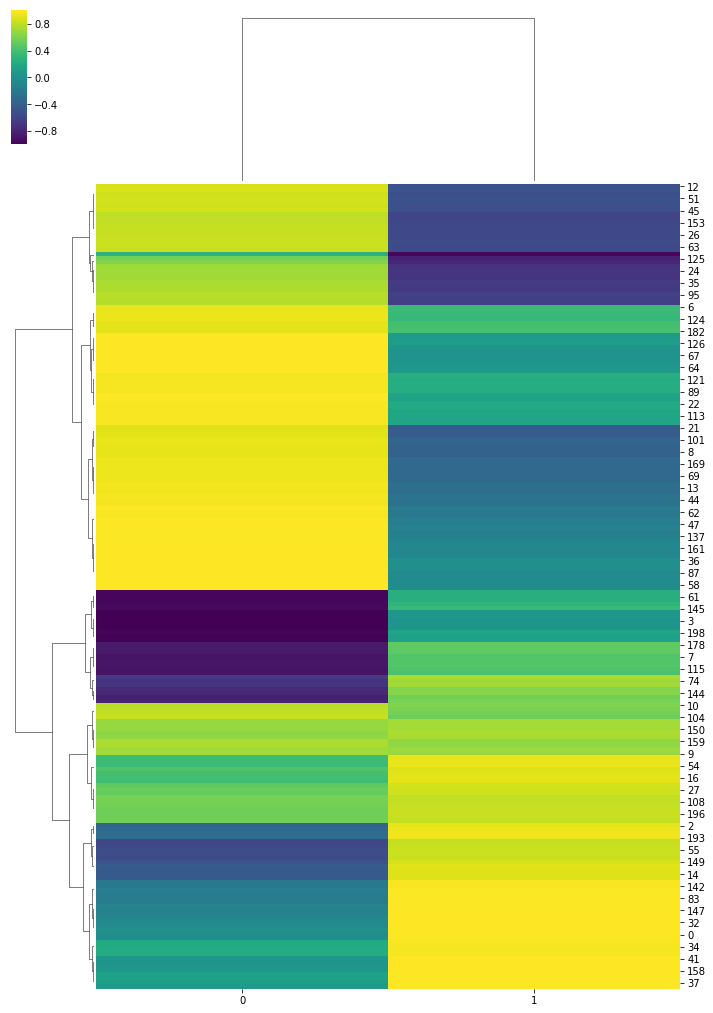

In [66]:
sns.clustermap(normalized_data, figsize=(12,18), method='ward', cmap='viridis')
plt.show()